<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [6]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [7]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

##### Your Code Here #####
df = pd.read_csv('/Users/israel/PycharmProjects/DS-Unit-4-Sprint-1-NLP/module2-vector-representations/data/job_listings.csv')

# clean up html description column
def clean_description(df):
    soup = BeautifulSoup(df, 'html.parser')
    clean = soup.get_text()
#     clean = clean.replace("\\n", " ")
#     clean = clean.replace('\\xe2\\x80\\x99', ' ')
#     clean = clean.replace('\\xe2\\x80\\xa6', ' ')
#     clean = clean.replace("\\", '')
#     clean = clean.replace('xe2x80x93', ' ')
    return clean
df['description'] = df['description'].apply(clean_description)
df.drop('Unnamed: 0', axis=1, inplace=True)

## 2) Use Spacy to tokenize the listings 

In [8]:
##### Your Code Here #####
nlp = spacy.load("en_core_web_lg")
def spacy(df):
    doc = nlp(df)
    return ([token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)])
df['description'] = df['description'].apply(spacy)

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [9]:
# ##### Your Code Here #####
# vector = CountVectorizer(stop_words='english')
# def vectorize(df):
#     dfdes = df['description']
#     dfdes = dfdes.tolist()
#     flat_list = []
#     for sublist in dfdes:
#         for item in sublist:
#             flat_list.append(item)
#     dfdes = flat_list
#     vector.fit(dfdes)
#     tran = vector.transform(dfdes)
#     return pd.DataFrame(tran.todense(), columns=vector.get_feature_names())
# dmt = vectorize(df)
# dmt

vector = CountVectorizer(stop_words='english')
dfdes = df['description'].tolist()
dfdes

vector.fit(dfdes)
tran = vector.transform(dfdes)
dmt = pd.DataFrame(tran.todense(), columns=vector.get_feature_names())
dmt

AttributeError: 'list' object has no attribute 'lower'

## 4) Visualize the most common word counts

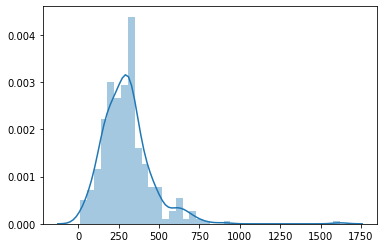

In [10]:
##### Your Code Here #####
doc_len = [len(doc) for doc in dfdes]
import seaborn as sns
sns.distplot(doc_len);

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [11]:
##### Your Code Here #####
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=100)
dtm = tfidf.fit_transform(dfdes)
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

dtm.head()

AttributeError: 'list' object has no attribute 'lower'

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [ ]:
##### Your Code Here #####
job_des = ["I would like a high paying job that uses pandas, sql works with dataframes and has a fun environment"]

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

In [ ]:
job = tfidf.transform(job_des)

In [ ]:
nn.kneighbors(job.todense())

In [ ]:
dfdes[384]

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 